In [1]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createData
from feedforward import FeedForwardNN, BCELoss

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

(150, 2)


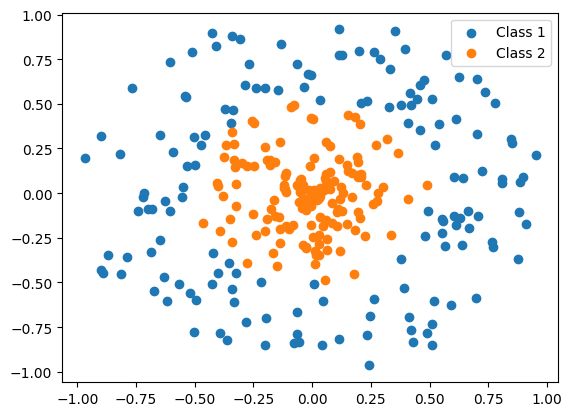

In [2]:
class1, class2 = createData(150, 150)
print(class1.shape)
plt.scatter(class1[:,0], class1[:,1], label="Class 1")
plt.scatter(class2[:,0], class2[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [3]:
nn = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [4, 4, 2], activation = "relu", output_activation = "sigmoid")
weights = nn.weights()
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

(4, 2)
[[ 0.61160761 -0.18460562]
 [-0.37438954 -0.63700187]
 [ 0.2006843   0.03725135]
 [-0.23949118 -0.4476813 ]]
(4, 4)
[[ 0.20249602 -0.13209339 -0.32218107 -0.04278641]
 [ 0.45522815  0.1253358   0.23453768  0.02365262]
 [ 0.46363795 -0.01118881  0.09386053  0.48119314]
 [-0.08078703  0.11809144 -0.32005712  0.11540722]]
(2, 4)
[[-0.35169246 -0.17912286  0.27584735 -0.43258125]
 [-0.47280541 -0.11827375 -0.16041457 -0.16666949]]
(1, 2)
[[ 0.51684499 -0.34271007]]


### Quick forward call

In [4]:
input = class1[0]
output = nn.forward(input)
print(output)
loss = BCELoss(output[0], 1)
print(loss)

[0.5079849495484585]
0.6773034587156528


### Train network on the two classes

In [5]:
nr_epochs = 300
learning_rate = 0.001
running_loss = 0
loss = []
for epoch in range(nr_epochs):
    # class1
    target = 1
    for i in range(class1.shape[0]):
        output = nn.forward(class1[i])[0]
        running_loss += BCELoss(output, target)
        nn.backprop(class1[i], output, target, "BCELoss", learning_rate)

    # class2
    target = 0
    for i in range(class2.shape[0]):
        output = nn.forward(class2[i])[0]
        running_loss += BCELoss(output, target)
        nn.backprop(class1[i], output, target, "BCELoss", learning_rate)

    
    loss.append(running_loss / (class1.shape[0] + class2.shape[0]))
    running_loss = 0
    if (epoch % 20 == 0):
        print(loss[-1])

0.6926725879844026
0.6926461033517382


KeyboardInterrupt: 

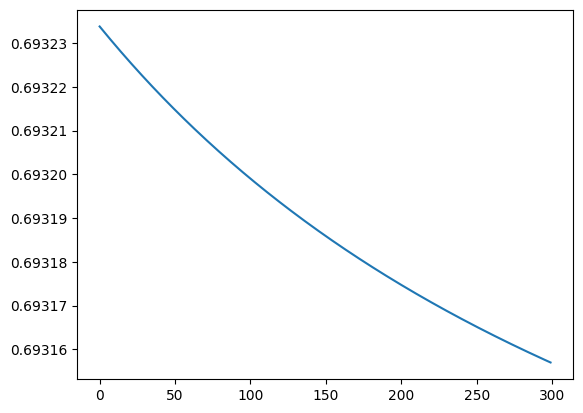

In [ ]:
plt.plot(loss)
plt.show()